In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("House Price Prediction Dataset.csv")

In [2]:

df=df.iloc[:,1:]
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       2000 non-null   int64 
 1   Bedrooms   2000 non-null   int64 
 2   Bathrooms  2000 non-null   int64 
 3   Floors     2000 non-null   int64 
 4   YearBuilt  2000 non-null   int64 
 5   Location   2000 non-null   object
 6   Condition  2000 non-null   object
 7   Garage     2000 non-null   object
 8   Price      2000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 140.8+ KB


In [4]:
df.describe()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [5]:
df.isnull().sum()

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [6]:
df.shape

(2000, 9)

In [7]:
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location',
       'Condition', 'Garage', 'Price'],
      dtype='object')

In [8]:
df[df.duplicated()]

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price


In [9]:
cat = []
num = []
for i in df.columns:
    if df[i].nunique()<10:
        print(i,df[i].nunique(),df[i].unique())
        cat.append(i)
    else:
        num.append(i)

Bedrooms 5 [5 2 4 1 3]
Bathrooms 4 [4 2 1 3]
Floors 3 [3 2 1]
Location 4 ['Downtown' 'Suburban' 'Urban' 'Rural']
Condition 4 ['Excellent' 'Good' 'Fair' 'Poor']
Garage 2 ['No' 'Yes']


In [10]:
cat

['Bedrooms', 'Bathrooms', 'Floors', 'Location', 'Condition', 'Garage']

In [11]:
num

['Area', 'YearBuilt', 'Price']

In [12]:
vc = df['Bedrooms'].value_counts()
vc

Bedrooms
1    418
3    406
4    405
5    403
2    368
Name: count, dtype: int64

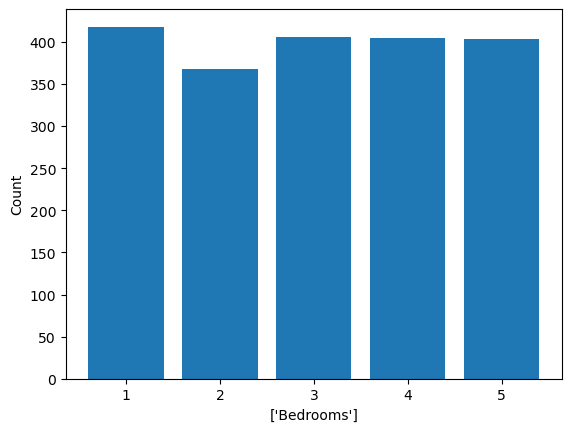

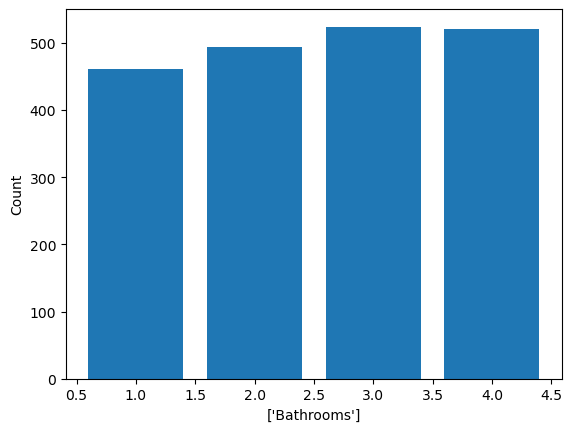

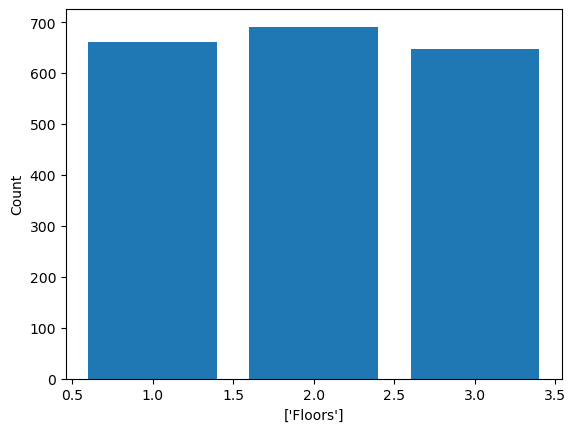

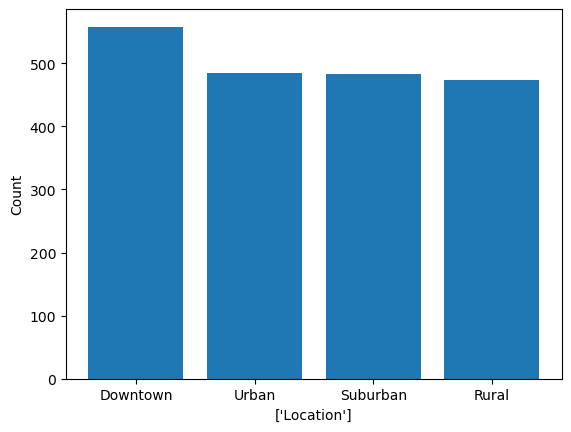

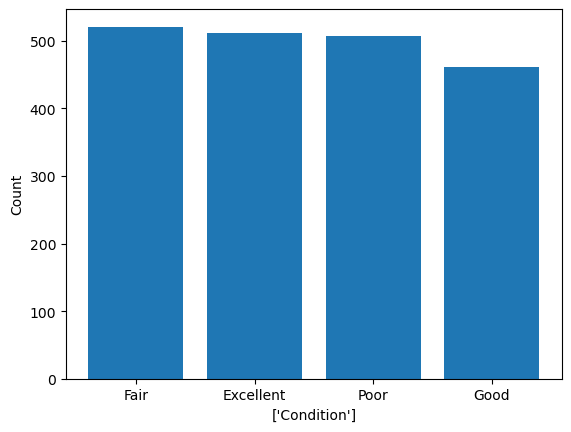

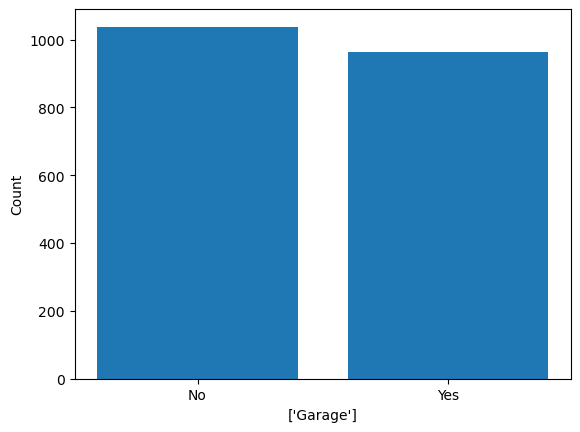

In [13]:
for i in cat:
    vc=df[i].value_counts()
    plt.bar(vc.index, height=vc)
    plt.xlabel([i])
    plt.ylabel("Count")
    plt.show()

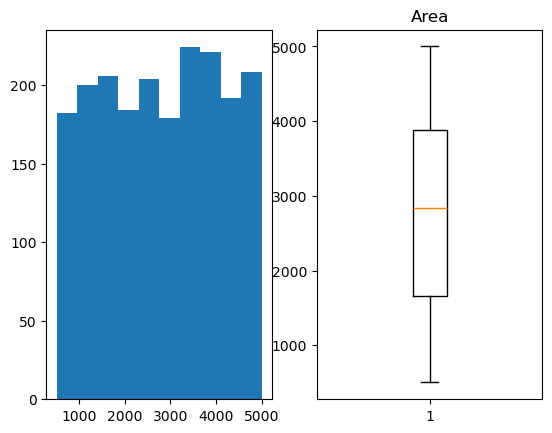

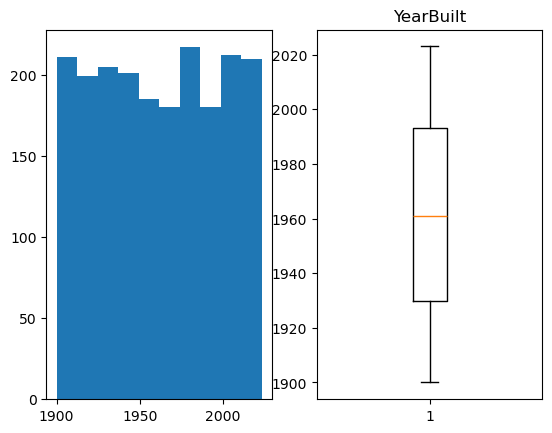

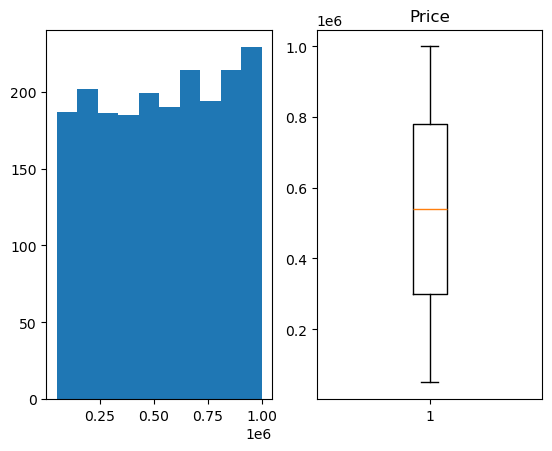

In [14]:
for i in num:
    fig, ax=plt.subplots(1,2)
    ax[0].hist(df[i])
    ax[1].boxplot(df[i])
    plt.title(i)
    plt.show()

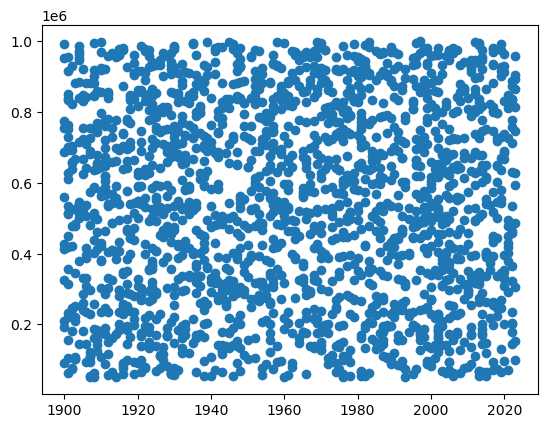

In [15]:
plt.scatter(df['YearBuilt'], df['Price'])

In [16]:
df['Location'].nunique()

4

In [17]:
df['Location'].unique()

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

### One Hot Encoding:
It convert a single categorical column into multiple columns where it recorders presense of categories as 0 or 1.

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
ohe = OneHotEncoder(sparse_output=False)
locations =ohe.fit_transform(df[['Location']])
locations

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [21]:
ohe.categories_

[array(['Downtown', 'Rural', 'Suburban', 'Urban'], dtype=object)]

In [22]:
type(locations)

numpy.ndarray

In [23]:
location_df = pd.DataFrame(locations, columns=ohe.categories_)
location_df=location_df.iloc[:,1:]

In [24]:
df = pd.concat([df, location_df], axis=1)
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,Excellent,No,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,Excellent,No,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,Good,No,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,Fair,Yes,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,Poor,No,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119,0.0,0.0,1.0


In [25]:
df['Condition'].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [26]:
df[['Condition']]=df[['Condition']].replace(to_replace=['Excellent', 'Good', 'Fair', 'Poor'], value=[3,2,1,0])

C:\Users\Admin\AppData\Local\Temp\ipykernel_13492\3353392836.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Condition']]=df[['Condition']].replace(to_replace=['Excellent', 'Good', 'Fair', 'Poor'], value=[3,2,1,0])


In [27]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,3,No,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,3,No,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,2,No,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,1,Yes,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,1,Yes,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,0,No,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,0,Yes,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,0,No,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,3,Yes,161119,0.0,0.0,1.0


In [28]:
df[['Garage']]=df[['Garage']].replace(to_replace=['No','Yes'], value=[0,1])
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_13492\3198035204.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Garage']]=df[['Garage']].replace(to_replace=['No','Yes'], value=[0,1])


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,3,0,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,3,0,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,2,0,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,1,1,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,1,1,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,0,0,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,0,1,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,0,0,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,3,1,161119,0.0,0.0,1.0


In [29]:
X_df = df.drop(['Location', 'Price'], axis=1)                   # Independent data
y = df['Price']                                                 # Dependent data
X_df   

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,3,0,0.0,0.0,0.0
1,4272,5,4,3,1958,3,0,0.0,0.0,0.0
2,3592,2,2,3,1938,2,0,0.0,0.0,0.0
3,966,4,2,2,1902,1,1,0.0,1.0,0.0
4,4926,1,4,2,1975,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,0,0,0.0,1.0,0.0
1996,3046,5,2,1,2019,0,1,0.0,1.0,0.0
1997,1062,5,1,2,1903,0,0,1.0,0.0,0.0
1998,4062,3,1,2,1936,3,1,0.0,0.0,1.0


In [30]:
X = X_df.values
y = y.values         #Converts data into numpy array

In [31]:
X

array([[1.360e+03, 5.000e+00, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.272e+03, 5.000e+00, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.592e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.062e+03, 5.000e+00, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.062e+03, 3.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.989e+03, 5.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [32]:
y

array([149919, 424998, 266746, ..., 476925, 161119, 482525], dtype=int64)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 10)
(400, 10)
(1600,)
(400,)


### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_train_pred = lr_model.predict(X_train)  # It uses a trained machine learning model (lr_model) to make predictions on the training data (X_train).
                                          # The predictions are stored in y_train_pred.

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
mse_train = mean_squared_error(y_train_pred, y_train)
rmse_train = mean_squared_error(y_train_pred, y_train)**0.5
mae_train = mean_absolute_error(y_train_pred, y_train)
r2_lin_train = r2_score(y_train, y_train_pred) #R² values range from 0 to 1 (sometimes negative for bad models).
                                               #Closer to 1 → Model explains most of the variance.
                                               #Closer to 0 → Model is weak.
                                               #Negative R² → Model is worse than just predicting the mean.
print(mse_train)
print(rmse_train)
print(mae_train)
print(r2_lin_train)

77493835068.88966
278377.1453781536
241404.41501856488
0.005990048684153981


In [40]:
y_test_pred = lr_model.predict(X_test)
mse_test = mean_squared_error(y_test_pred, y_test)
rmse_test = mean_squared_error(y_test_pred, y_test)**0.5
mae_test = mean_absolute_error(y_test_pred, y_test)
r2_lin_test = r2_score(y_test, y_test_pred)

print(mse_test)
print(rmse_test)
print(mae_test)
print(r2_lin_test)

69950148039.25958
264480.90297649015
226115.13920729904
-0.0005046830542836389


### Assumptions of Linear Regression
- 1. No Multi-collinearity - There should not be any multi collinearity in X, column redundancy.
Because there is relation in between columns then we need to keep only one column, eg. Age and Year columns
X should be non be multi-colinear(columns in X dataframe should not be inter related to each other)
so dropping 'Downtown' column because we have relation between 'rural','urban','suburban' columns
correlation is : If it is 'Downtime' then its not 'rural','urban','suburban'
                 If it is 'Rural' then its not 'Downtime','urban','suburban'
                 If it is 'urban' then its not 'Downtime','rural','rural'
                 If it is 'Suburban' then its not 'Downtime','urban','suburban'
   Hint : After one hot encoding, drop one column which has correlations
- 2. Linearity : Every independent column must have linear relationship with dependent column(value of independent is increasing and dependent is increasing or decreasing or vice versa)
- 3. Normality of Residuals : errors must be normally distributed(means error will be close to zero)
- 4. No auto-correlation : There has to be no auto-correlation between the errors of different predicted values, between the rows(means the error is increasing or decreasing for ever predicted value)
- 5. Homoscadasticity : There should be Homoscadasticity. Error should be in constant range.

Linearity:



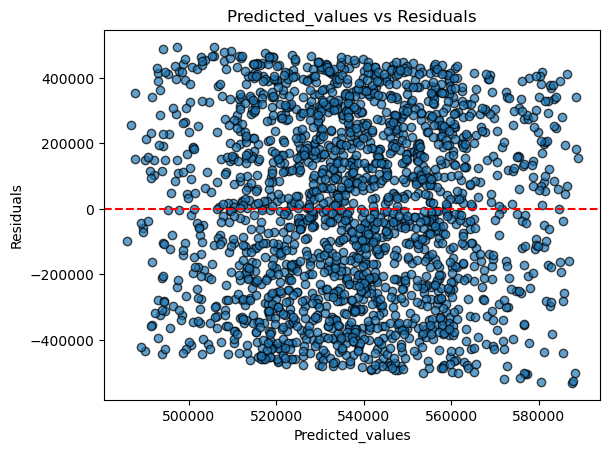

Check if the residuals are randomly scattered around 0. Non random patters indicate non-linearity 
Independence of Errors (Durbin Watson Error

durbin_watson statistics : 2.05200053512817
Residuals appear to be independent (No correlation).

Homoscadasticity (Breuschpagan Test):

Lagrange Multiplier Statistics: 15.078459339348926
p-value: 0.1292274461305624
Residuals have constant variance (Homoscadasticity).

4.Normality of errors:



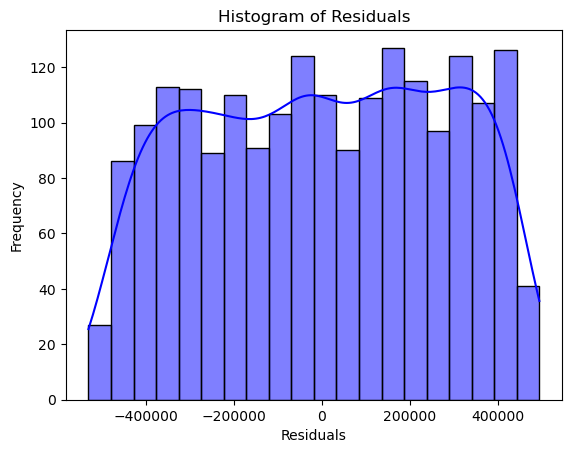

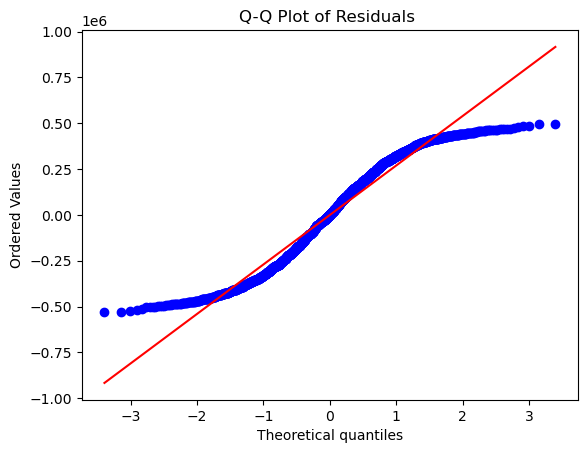

Shapiro-Wilk Test p-value: 6.702111000273872e-24
Residuals are not normally distributed Consider Transformations or robust regression.

Multicollinearity (Variance Inflation Factor)

       Feature        VIF
0         Area   5.637487
1     Bedrooms   5.461421
2    Bathrooms   6.303591
3       Floors   7.068938
4    YearBuilt  26.095359
5    Condition   2.753059
6       Garage   1.936333
7     (Rural,)   1.852613
8  (Suburban,)   1.866990
9     (Urban,)   1.868833
High multicollinearity detected. Consider removing or combining highly correlated variables.



In [42]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, probplot

def test_linear_regression_assumption(X, y, X_df):
    """
    Test the key assumptions of linear regression: linearity, independence, homoscadasticity, normality of residuals amd no multicollinearity.
    
    Parameters:
    X_df (DataFrame) : Independent variable 
    y : Series
    Returns:
    None
    """
# Add constant to X for intercept
X = sm.add_constant(X)

# Fit the OLS Model
ols_model = sm.OLS(y,X).fit()
residuals = ols_model.resid
predicted_values = ols_model.fittedvalues

# Linearity:
print("Linearity:\n")
plt.scatter(predicted_values, residuals, alpha=0.7, edgecolors='k' )
plt.axhline(y=0, color='r' , linestyle='--')
plt.xlabel("Predicted_values")
plt.ylabel("Residuals")
plt.title("Predicted_values vs Residuals")
plt.show()
print("Check if the residuals are randomly scattered around 0. Non random patters indicate non-linearity ")

# No auto-correlation: Independence of Errors
print("Independence of Errors (Durbin Watson Error\n")
dw_stat = durbin_watson(residuals)
print(f"durbin_watson statistics : {dw_stat}")
if 1.5<= dw_stat <=2.5:
    print("Residuals appear to be independent (No correlation).\n")
else:
    print("Residuals show autocorrelation. Consider adding lag variables or using GLS.\n")

# Homoscadasticity:
print("Homoscadasticity (Breuschpagan Test):\n")
bp_test = het_breuschpagan(residuals, X)
print(f"Lagrange Multiplier Statistics: {bp_test[0]}")
print(f"p-value: {bp_test[1]}")
if bp_test[1] > 0.05:
    print("Residuals have constant variance (Homoscadasticity).\n")
else:
    print("Residuals do not have constant variance (Heteroscadasticity) Consider GLS or Transformations.\n")

# 4. Normality of errors: 
print("4.Normality of errors:\n")
sns.histplot(residuals,kde=True,bins=20,color='blue')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals ")
plt.show()

shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")
if shapiro_test.pvalue> 0.05:
    print("Residuals are normally distributed.\n")
else:
    print("Residuals are not normally distributed Consider Transformations or robust regression.\n")

# Multicollinearity:
print("Multicollinearity (Variance Inflation Factor)\n")
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
print(vif_data)
if vif_data['VIF'].max() > 10:
    print("High multicollinearity detected. Consider removing or combining highly correlated variables.\n")
else:
    print("No significant multicollinearity detected.\n")

### Polynomial Regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
poly=PolynomialFeatures(degree=2)
X_poly_train=poly.fit_transform(X_train)
X_poly_test=poly.transform(X_test)

In [46]:
X_train[0].size

10

In [47]:
X_poly_train[0].size

66

In [48]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_train)
y_poly_pred

array([501083.04635618, 561443.70256782, 440790.74414939, ...,
       556211.87857297, 520856.03627737, 524979.9601187 ])

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_poly_train =mean_squared_error(y_poly_pred, y_train)
rmse_poly_train =mean_squared_error(y_poly_pred, y_train)**0.5
mae_poly_train =mean_absolute_error(y_poly_pred, y_train)
r2_poly_train= r2_score(y_train, y_poly_pred)
print(mse_poly_train)
print(rmse_poly_train)
print(mae_poly_train)
print(r2_poly_train)

75312989993.36852
274432.1227432542
236584.88053249026
0.03396365078319952


In [50]:
y_poly_test_pred = poly_model.predict(X_poly_test)
mse_poly_test = mean_squared_error(y_poly_test_pred, y_test)
rmse_poly_test = mean_squared_error(y_poly_test_pred, y_test)**0.5
mae_poly_test = mean_absolute_error(y_poly_test_pred, y_test)
r2_poly_test= r2_score(y_test, y_poly_test_pred)

print(mse_poly_test)
print(rmse_poly_test)
print(mae_poly_test)
print(r2_poly_test)

71079525773.58295
266607.43758114276
225985.53925404986
-0.016658297361054952


#### Overfitting: It performs well with the training data and does not perform well with testing data.

#### Regularization : Lasso or L1 (It will eliminate the least important features) 
- Linear Regularization y = b0 + b1x1 + b2x2 + b3x3
- Lasso = Cost Function + Lambda * (bi)

### Lasso

In [54]:
# Lasso
from sklearn.linear_model import Lasso, Ridge, ElasticNet

l1 = Lasso(alpha= 1.0)
l1.fit(X_train, y_train)
y_pred_train_l1= l1.predict(X_train)

mse_l1_train =mean_squared_error(y_pred_train_l1, y_train)
rmse_l1_train =mean_squared_error(y_pred_train_l1, y_train)**0.5
mae_l1_train =mean_absolute_error(y_pred_train_l1, y_train)
r2_l1_train =r2_score(y_train, y_pred_train_l1)
print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)

77493835091.66805
278377.1454190664
241404.44889964082
0.005990048391976699


In [55]:
# On testing data
l1=Lasso(alpha=1.0)                                   # alpha is lamda, to fine tune the error
l1.fit(X_test,y_test)
y_pred_test_l1=l1.predict(X_test) 

mse_l1_test=mean_squared_error(y_pred_test_l1,y_test)
rmse_l1_test=mean_squared_error(y_pred_test_l1,y_test)**0.5
mae_l1_test=mean_absolute_error(y_pred_test_l1,y_test)
r2_l1_test=r2_score(y_test,y_pred_test_l1)            # goodness of fit of training data, range is 0 to 1
print(mse_l1_test)
print(rmse_l1_test)
print(mae_l1_test)
print(r2_l1_test)

68300008365.38242
261342.70291206223
222357.49291371688
0.023097446715065417


#### Ridge = Cost Function + Lambda * (bi**2) 
- It reduce the importance of features and adds an error.

In [57]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

l2 = Ridge(alpha= 1.0)
l2.fit(X_train, y_train)
y_pred_train_l2= l2.predict(X_train)

mse_l2_train =mean_squared_error(y_pred_train_l2, y_train)
rmse_l2_train =mean_squared_error(y_pred_train_l2, y_train)**0.5
mae_l2_train =mean_absolute_error(y_pred_train_l2, y_train)
r2_l2_train =r2_score(y_train, y_pred_train_l2)
print(mse_l2_train)
print(rmse_l2_train)
print(mae_l2_train)
print(r2_l2_train)

77493836998.93173
278377.1488447493
241405.5710556811
0.005990023927590737


In [58]:
l2 = Ridge(alpha= 1.0)
l2.fit(X_test, y_test)
y_pred_test_l2= l2.predict(X_test)

mse_l2_test =mean_squared_error(y_pred_test_l2, y_test)
rmse_l2_test =mean_squared_error(y_pred_test_l2, y_test)**0.5
mae_l2_test =mean_absolute_error(y_pred_test_l2, y_test)
r2_l2_test =r2_score(y_test, y_pred_test_l2)
print(mse_l2_test)
print(rmse_l2_test)
print(mae_l2_test)
print(r2_l2_test)

68300086592.35385
261342.85257560393
222361.4055325707
0.023096327826064522


### ElasticNet : It is the combination of Lasso and Ridge.

In [60]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

l3 = ElasticNet(alpha= 1.0, l1_ratio = 0.6)
l3.fit(X_train, y_train)
y_pred_train_l3= l3.predict(X_train)

mse_l3_train =mean_squared_error(y_pred_train_l3, y_train)
rmse_l3_train =mean_squared_error(y_pred_train_l3, y_train)**0.5
mae_l3_train =mean_absolute_error(y_pred_train_l3, y_train)
r2_l3_train =r2_score(y_train, y_pred_train_l3)
print(mse_l3_train)
print(rmse_l3_train)
print(mae_l3_train)
print(r2_l3_train)

77617289888.01068
278598.79735564307
241859.75173997658
0.0044064992490912


In [61]:
l3 = ElasticNet(alpha= 1.0, l1_ratio = 0.6)
l3.fit(X_test, y_test)
y_pred_test_l3= l3.predict(X_test)

mse_l3_test =mean_squared_error(y_pred_test_l3, y_test)
rmse_l3_test =mean_squared_error(y_pred_test_l3, y_test)**0.5
mae_l3_test =mean_absolute_error(y_pred_test_l3, y_test)
r2_l3_test =r2_score(y_test, y_pred_test_l3)
print(mse_l3_test)
print(rmse_l3_test)
print(mae_l3_test)
print(r2_l3_test)

68620138661.83977
261954.45913715567
223178.796137904
0.018518587773789563


### K-nearest neighbour

In [63]:
from sklearn.neighbors import KNeighborsRegressor
knn_r = KNeighborsRegressor(n_neighbors=5)
knn_r.fit(X_train, y_train)
y_train_knn=knn_r.predict(X_train)

mse_knn_train =mean_squared_error(y_train_knn, y_train)
rmse_knn_train =mean_squared_error(y_train_knn, y_train)**0.5
mae_knn_train =mean_absolute_error(y_train_knn, y_train)
r2_knn_train =r2_score(y_train, y_train_knn)
print(mse_knn_train)
print(rmse_knn_train)
print(mae_knn_train)
print(r2_knn_train)

62241443102.0991
249482.35028173655
208717.44225000002
0.2016317972552757


In [64]:
knn_r = KNeighborsRegressor(n_neighbors=5)
knn_r.fit(X_test, y_test)
y_test_knn=knn_r.predict(X_test)

mse_knn_test =mean_squared_error(y_test_knn, y_test)
rmse_knn_test =mean_squared_error(y_test_knn, y_test)**0.5
mae_knn_test =mean_absolute_error(y_test_knn, y_test)
r2_knn_test =r2_score(y_test, y_test_knn)
print(mse_knn_test)
print(rmse_knn_test)
print(mae_knn_test)
print(r2_knn_test)

54771849353.604904
234033.863689862
197460.7575
0.2165921972449698


### Support Vector Machine

In [66]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_train_svr=svr.predict(X_train)

mse_svr_train =mean_squared_error(y_train_svr, y_train)
rmse_svr_train =mean_squared_error(y_train_svr, y_train)**0.5
mae_svr_train =mean_absolute_error(y_train_svr, y_train)
r2_svr_train =r2_score(y_train, y_train_svr)
print(mse_svr_train)
print(rmse_svr_train)
print(mae_svr_train)
print(r2_svr_train)

77976591027.4183
279242.8889469136
242440.25955444865
-0.00020224037223237623


In [67]:
svr = SVR()
svr.fit(X_test, y_test)
y_test_svr=svr.predict(X_test)

mse_svr_test =mean_squared_error(y_test_svr, y_test)
rmse_svr_test =mean_squared_error(y_test_svr, y_test)**0.5
mae_svr_test =mean_absolute_error(y_test_svr, y_test)
r2_svr_test =r2_score(y_test, y_test_svr)
print(mse_svr_test)
print(rmse_svr_test)
print(mae_svr_test)
print(r2_svr_test)

69993567894.68971
264562.9752907419
225485.4405501855
-0.0011257220358020792


### Decision Tree Regressor

In [69]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=3, random_state=0)
dtree.fit(X_train, y_train)
y_train_dtree=dtree.predict(X_train)

mse_dtree_train =mean_squared_error(y_train_dtree, y_train)
rmse_dtree_train =mean_squared_error(y_train_dtree, y_train)**0.5
mae_dtree_train =mean_absolute_error(y_train_dtree, y_train)
r2_dtree_train =r2_score(y_train, y_train_dtree)
print(mse_dtree_train)
print(rmse_dtree_train)
print(mae_dtree_train)
print(r2_dtree_train)

76409611628.01125
276422.885499756
238873.53752098395
0.019897334195640104


In [70]:
y_test_dtree = dtree.predict(X_test)

mse_dtree_test =mean_squared_error(y_test_dtree, y_test)
rmse_dtree_test =mean_squared_error(y_test_dtree, y_test)**0.5
mae_dtree_test =mean_absolute_error(y_test_dtree, y_test)
r2_dtree_test =r2_score(y_test, y_test_dtree)
print(mse_dtree_test)
print(rmse_dtree_test)
print(mae_dtree_test)
print(r2_dtree_test)

70161512117.22006
264880.1844555762
224392.8464251668
-0.0035278467752553055


### Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=20, n_estimators=100 ,random_state=0)
forest.fit(X_train, y_train)
y_train_forest=forest.predict(X_train)

mse_forest_train =mean_squared_error(y_train_forest, y_train)
rmse_forest_train =mean_squared_error(y_train_forest, y_train)**0.5
mae_forest_train =mean_absolute_error(y_train_forest, y_train)
r2_forest_train =r2_score(y_train, y_train_forest)
print(mse_forest_train)
print(rmse_forest_train)
print(mae_forest_train)
print(r2_forest_train)

12851865341.98795
113366.0678597787
96456.74928959832
0.8351496989205558


In [73]:
forest = RandomForestRegressor(max_depth=20, n_estimators=100 ,random_state=0)
forest.fit(X_test, y_test)
y_test_forest=forest.predict(X_test)

mse_forest_test =mean_squared_error(y_test_forest, y_test)
rmse_forest_test =mean_squared_error(y_test_forest, y_test)**0.5
mae_forest_test =mean_absolute_error(y_test_forest, y_test)
r2_forest_test =r2_score(y_test, y_test_forest)
print(mse_forest_test)
print(rmse_forest_test)
print(mae_forest_test)
print(r2_forest_test)

10886351057.13383
104337.67803211758
88073.43237175595
0.8442913200423494
